# Crypto Arbitrage Application


This application is to calculate if the opportunity exists to capitalize on simultaneous price dislocations in markets by using the powers of Pandas.

Let's sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase in the 1st Qrt. 2018. 

To best perform the calculations, let's also apply the 3 phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

Briefly, the 3 phases are

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 

Follow the steps below to run the complete series of calculation. The results will illustrate whether the opporturnity exist or not.


###  Import Pandas and Path libraries and Matplotlib dependency.

In [65]:
import pandas as pd
from pathlib import Path
%matplotlib inline

# Phase 1: Collect the Data

Following these steps:

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [66]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp_dataframe = pd.read_csv(
    Path('Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Confirm that Pandas properly imported the data by Using the `head` (and/or the `tail`) function.

In [67]:
# Use the head function to confirm that the data first 5 lines of data.
bitstamp_dataframe.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [68]:
# Use the tail function to confirm that the data last 5 lines of data.
bitstamp_dataframe.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Perform Steps 1 and 2 for `coinbase.csv` file.

In [69]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_dataframe =  pd.read_csv(
    Path('Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [70]:
# Use the head function to confirm that the data first 5 lines of data.
coinbase_dataframe.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [71]:
# Use the tail function to confirm that the data last 5 lines of data.
coinbase_dataframe.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


# Phase 2: Prepare and Clean Data for analysis

Complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [72]:
# For the bitstamp DataFrame, drop all NaNs or missing values in the DataFrame

bitstamp_dataframe = bitstamp_dataframe.dropna()

# View first 5 lines of data without all NaNs or missing values
bitstamp_dataframe.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Using the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [73]:
# Use the str.replace function to remove the dollar sign, $

bitstamp_dataframe.loc[:, "Close"] = bitstamp_dataframe.loc[:, "Close"].str.replace("$", "")

#View dtype to identify 'objects'
bitstamp_dataframe.dtypes


/var/folders/kb/q7fccrrj0tbffyxscfstnnn00000gn/T/ipykernel_15118/839463691.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp_dataframe.loc[:, "Close"] = bitstamp_dataframe.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [74]:
# Convert the Close data type to a float

bitstamp_dataframe.loc[:, "Close"] = bitstamp_dataframe.loc[:, "Close"].astype(float)

#View dtype to confirm all data is float64.
bitstamp_dataframe.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [75]:
# Review data for duplicated values
bitstamp_dataframe.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [76]:
# Review the data for duplicate values, and drop them if necessary

bitstamp_dataframe = bitstamp_dataframe.drop_duplicates()

#drop them if necessary
bitstamp_dataframe.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [77]:
# Repeat Steps 1–4 for the coinbase DataFrame

coinbase_dataframe = coinbase_dataframe.dropna()

# View first 5 lines of data without all NaNs or missing values
coinbase_dataframe.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [78]:
# Remove the dollar sign, $ by using the str.replace function 

coinbase_dataframe.loc[:, "Close"] = coinbase_dataframe.loc[:, "Close"].str.replace("$", "")

#View dtype to confirm all data is float64.
coinbase_dataframe.dtypes

/var/folders/kb/q7fccrrj0tbffyxscfstnnn00000gn/T/ipykernel_15118/1899849703.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase_dataframe.loc[:, "Close"] = coinbase_dataframe.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [79]:
# Convert the Close data type to a float
coinbase_dataframe.loc[:, "Close"] = coinbase_dataframe.loc[:, "Close"].astype(float)

#View dtype to confirm all data is float64.
coinbase_dataframe.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [80]:
# Review data for duplicated values
coinbase_dataframe.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [81]:
# Review the data for duplicate values, and drop them if necessary
coinbase_dataframe = coinbase_dataframe.drop_duplicates()

#drop them if necessary
coinbase_dataframe.duplicated().sum()

0

# Phase 3: Analyze the Data

### The analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis; in this case, it is the "Close" price column for each exchange.

2. Get the summary statistics and plot the data for each exchange.

3. Focus your analysis on specific dates. Here, 3 dates are: 1 'early' date (Jan.15th), 1 'middle' date (Feb 15th), and 1 'late' date (Mar15th). These will be used for comparison.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [82]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_dataframe.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [83]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_dataframe.loc[:, "Close"]

# Review the first and last five rows of the DataFrame
coinbase_sliced

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64

## Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. The degree of spread change as time progressed.

In [84]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [85]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp BTC Prices'}, xlabel='Timestamp'>

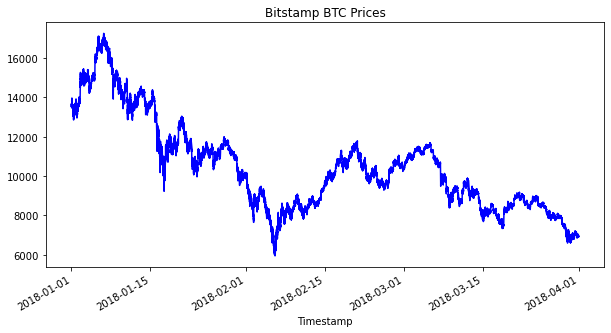

In [86]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), color="blue", title="Bitstamp BTC Prices")

<AxesSubplot:title={'center':'Coinbase BTC Prices'}, xlabel='Timestamp'>

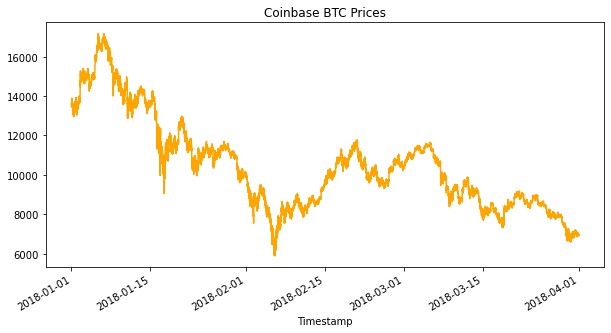

In [87]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), color="orange", title="Coinbase BTC Prices")


<AxesSubplot:title={'center':'Bitstamp BTC Prices v. Coinbase BTC Prices'}, xlabel='Timestamp'>

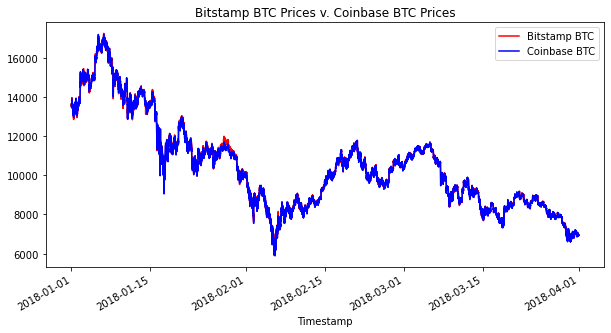

In [88]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(10, 5), title="Bitstamp BTC Prices v. Coinbase BTC Prices", color="red", label="Bitstamp BTC")
coinbase_sliced.plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

<AxesSubplot:title={'center':'Bitstamp BTC Prices v. Coinbase BTC Prices'}, xlabel='Timestamp'>

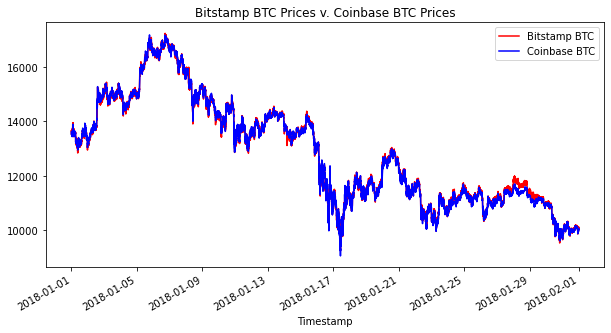

In [89]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(10, 5), title="Bitstamp BTC Prices v. Coinbase BTC Prices", color="red", label="Bitstamp BTC")
coinbase_sliced.loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

<AxesSubplot:title={'center':'Bitstamp BTC v. Coinbase BTC'}, xlabel='Timestamp'>

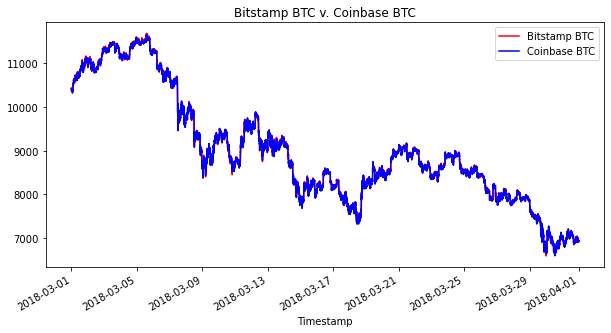

In [90]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(10, 5), title="Bitstamp BTC v. Coinbase BTC", color="red", label="Bitstamp BTC")
coinbase_sliced.loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** At the end of January, there was some price disparity between the exchanges; couple days of arbitrage opportunity. However, in March, prices stayed consistent between the exchanges. No arbitrage opportunity in March.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select 3 dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period. Here, Jan 15, Feb 15 and Mar 15 are selected for comparison.

2. For each of the 3 dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp BTC Price v. Coinbase BTC Price for 01-15-2018'}, xlabel='Timestamp'>

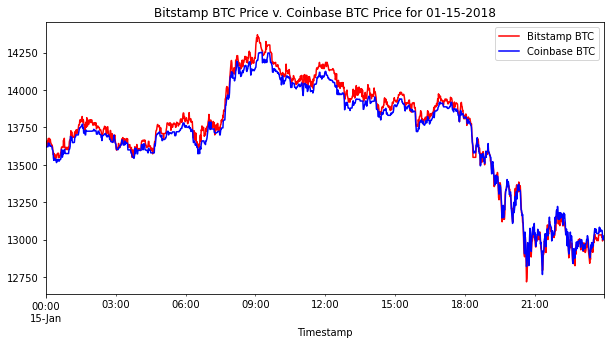

In [91]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced.loc['2018-01-15'].plot(legend=True, figsize=(10, 5), title="Bitstamp BTC Price v. Coinbase BTC Price for 01-15-2018", color="red", label="Bitstamp BTC")
coinbase_sliced.loc['2018-01-15'].plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

In [92]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-15'] - coinbase_sliced.loc['2018-01-15']

# Generate the summary statistics.
arbitrage_spread_early.describe()

count    1440.000000
mean       28.953458
std        35.145705
min      -106.080000
25%        10.000000
50%        34.035000
75%        52.217500
max       170.980000
Name: Close, dtype: float64

<AxesSubplot:>

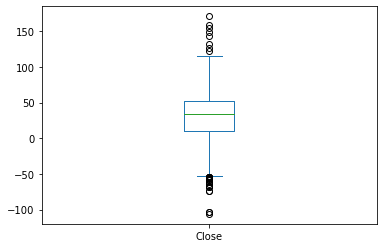

In [93]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp BTC Price v. Coinbase BTC Price for 2018-02-15'}, xlabel='Timestamp'>

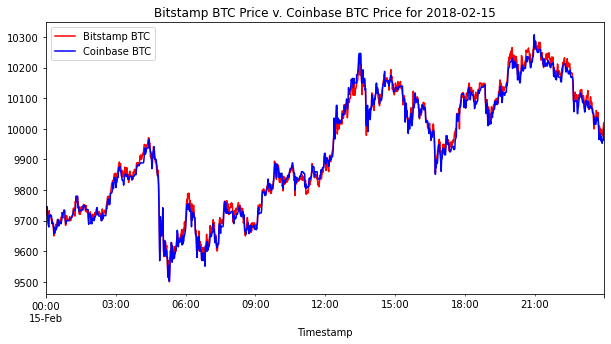

In [94]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-15'].plot(legend=True, figsize=(10, 5), title="Bitstamp BTC Price v. Coinbase BTC Price for 2018-02-15", color="red", label="Bitstamp BTC")
coinbase_sliced.loc['2018-02-15'].plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

In [95]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-15'] - coinbase_sliced.loc['2018-02-15']

# Generate the summary statistics
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:>

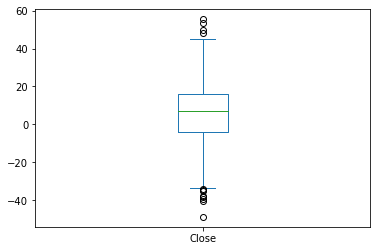

In [96]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp BTC Price v. Coinbase BTC Price for 2018-03-15'}, xlabel='Timestamp'>

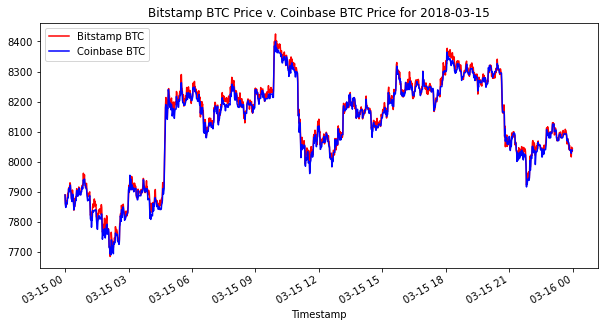

In [97]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-15'].plot(legend=True, figsize=(10, 5), title="Bitstamp BTC Price v. Coinbase BTC Price for 2018-03-15", color="red", label="Bitstamp BTC")
coinbase_sliced.loc['2018-03-15'].plot(legend=True, figsize=(10, 5), color="blue", label="Coinbase BTC")

In [98]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-15'] - coinbase_sliced.loc['2018-03-15']

# Generate the summary statistics
arbitrage_spread_late.describe()

count    1437.00000
mean        8.76572
std        10.74975
min       -24.71000
25%         1.74000
50%         8.74000
75%        15.74000
max        48.98000
Name: Close, dtype: float64

<AxesSubplot:>

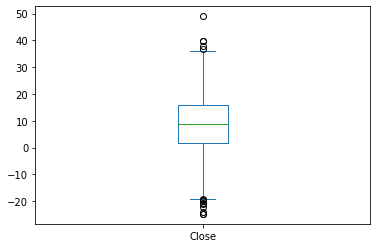

In [99]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [100]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

In [101]:
#arbitrage_spread_early
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-15'] - coinbase_sliced.loc['2018-01-15']

arbitrage_spread_early[arbitrage_spread_early >0].describe()

count    1166.000000
mean       42.124322
std        22.912901
min         0.010000
25%        26.315000
50%        40.290000
75%        56.150000
max       170.980000
Name: Close, dtype: float64

In [102]:
#arbitrage_spread_middle
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-15'] - coinbase_sliced.loc['2018-02-15']

arbitrage_spread_middle[arbitrage_spread_middle >0].describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

In [103]:
#arbitrage_spread_late
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-15'] - coinbase_sliced.loc['2018-03-15']

arbitrage_spread_late[arbitrage_spread_late >0].describe()

count    1148.000000
mean       12.506490
std         8.254083
min         0.010000
25%         5.937500
50%        11.180000
75%        18.002500
max        48.980000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [104]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-15']

# Drop NaNs
spread_return_early = spread_return_early.dropna()

# View DataFrame
spread_return_early

Timestamp
2018-01-15 00:01:00    0.001449
2018-01-15 00:02:00    0.002773
2018-01-15 00:03:00    0.001363
2018-01-15 00:04:00    0.002746
2018-01-15 00:05:00    0.000390
                         ...   
2018-01-15 23:07:00    0.001339
2018-01-15 23:32:00    0.000078
2018-01-15 23:56:00    0.000084
2018-01-15 23:57:00    0.001505
2018-01-15 23:58:00    0.001467
Name: Close, Length: 1166, dtype: float64

In [107]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced.loc['2018-02-15']

# Drop NaNs
spread_return_middle = spread_return_middle.dropna()

# View DataFrame
spread_return_middle

Timestamp
2018-02-15 00:06:00    0.000310
2018-02-15 00:07:00    0.001087
2018-02-15 00:08:00    0.001630
2018-02-15 00:09:00    0.000857
2018-02-15 00:10:00    0.000207
                         ...   
2018-02-15 23:55:00    0.001551
2018-02-15 23:56:00    0.002707
2018-02-15 23:57:00    0.004429
2018-02-15 23:58:00    0.002830
2018-02-15 23:59:00    0.000300
Name: Close, Length: 970, dtype: float64

In [108]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-15']

# Drop NaNs
spread_return_late = spread_return_late.dropna()

# View DataFrame
spread_return_late

Timestamp
2018-03-15 00:00:00    0.000124
2018-03-15 00:01:00    0.000435
2018-03-15 00:02:00    0.001255
2018-03-15 00:03:00    0.002614
2018-03-15 00:06:00    0.001541
                         ...   
2018-03-15 23:47:00    0.000357
2018-03-15 23:51:00    0.001947
2018-03-15 23:53:00    0.000042
2018-03-15 23:57:00    0.001274
2018-03-15 23:59:00    0.000670
Name: Close, Length: 1148, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [109]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-15 09:01:00    0.010460
2018-01-15 09:03:00    0.011057
2018-01-15 09:05:00    0.011898
2018-01-15 09:06:00    0.010727
Name: Close, dtype: float64

In [110]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs 

profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
print(profitable_trades_middle.head())

Series([], Name: Close, dtype: float64)


In [111]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [112]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    4.000000
mean     0.011035
std      0.000625
min      0.010460
25%      0.010660
50%      0.010892
75%      0.011267
max      0.011898
Name: Close, dtype: float64

In [113]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [114]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [115]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
profit_per_trade_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-15']

# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early = arbitrage_spread_early[arbitrage_spread_early> .01]
                                                 
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()                                                                               

Timestamp
2018-01-15 00:01:00    19.76
2018-01-15 00:02:00    37.88
2018-01-15 00:03:00    18.59
2018-01-15 00:04:00    37.51
2018-01-15 00:05:00     5.32
Name: Close, dtype: float64

In [116]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
profit_per_trade_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-02-15']

# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_middle = arbitrage_spread_middle[arbitrage_spread_middle> .01]
                                                 
# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_per_trade_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()     

Timestamp
2018-02-15 00:06:00     3.00
2018-02-15 00:07:00    10.53
2018-02-15 00:08:00    15.86
2018-02-15 00:09:00     8.33
2018-02-15 00:10:00     2.01
Name: Close, dtype: float64

In [117]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
profit_per_trade_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-15']


# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_late = arbitrage_spread_late[arbitrage_spread_late> .01]
                                                 
# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_per_trade_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()     

Timestamp
2018-03-15 00:00:00     0.98
2018-03-15 00:01:00     3.42
2018-03-15 00:02:00     9.86
2018-03-15 00:03:00    20.57
2018-03-15 00:06:00    12.13
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [118]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1166.000000
mean       42.124322
std        22.912901
min         0.010000
25%        26.315000
50%        40.290000
75%        56.150000
max       170.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Jan 15th 2018 Profit per Trade'}, xlabel='Timestamp'>

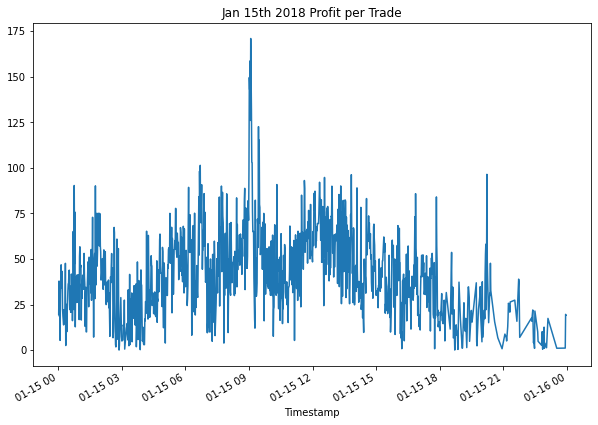

In [119]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="Jan 15th 2018 Profit per Trade")

In [120]:
profit_per_trade_middle.describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Feb 15th 2018 Profit per Trade'}, xlabel='Timestamp'>

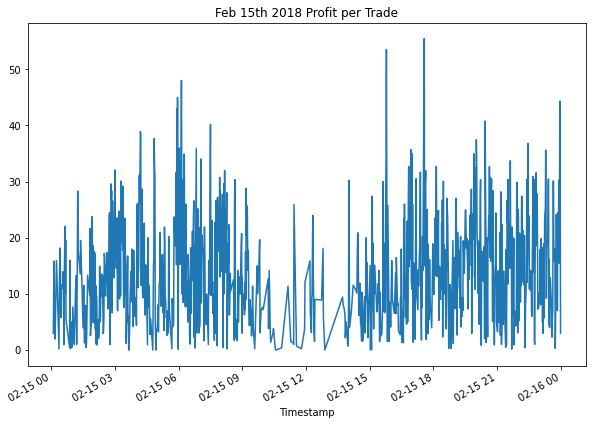

In [121]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title="Feb 15th 2018 Profit per Trade")

In [122]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    1148.000000
mean       12.506490
std         8.254083
min         0.010000
25%         5.937500
50%        11.180000
75%        18.002500
max        48.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Mar 15th 2018 Profit per Trade'}, xlabel='Timestamp'>

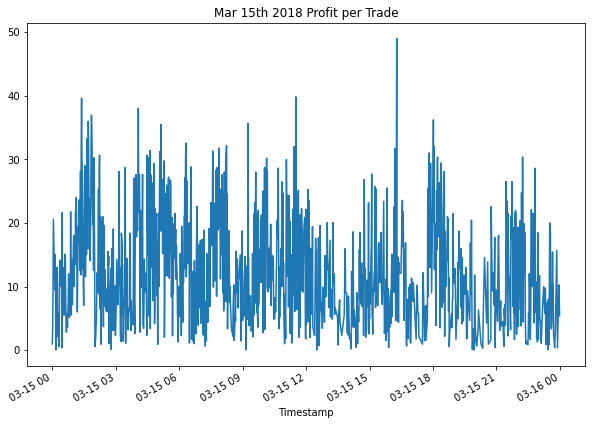

In [123]:
profit_per_trade_late.plot(figsize=(10, 7), title="Mar 15th 2018 Profit per Trade")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [124]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
sum_profit_early = profit_per_trade_early.sum()

#View early sum
sum_profit_early

49116.96000000001

In [125]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
sum_profit_middle = profit_per_trade_middle.sum()

#View middle sum
sum_profit_middle

13545.059999999987

In [126]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
sum_profit_late = profit_per_trade_late.sum()

#View late sum
sum_profit_late

14357.450000000003

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Identify any patterns or trends in the profits across the three time periods.

In [127]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumsum_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 01-15-2018'}, xlabel='Timestamp'>

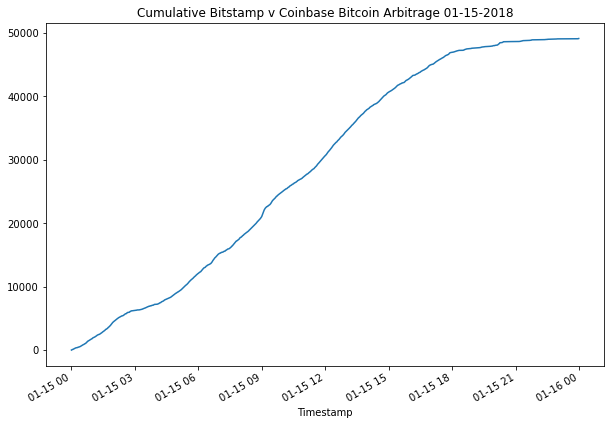

In [128]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumsum_profit_early.plot(figsize=(10,7), title="Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 01-15-2018")

<AxesSubplot:title={'center':'Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 02-15-2018'}, xlabel='Timestamp'>

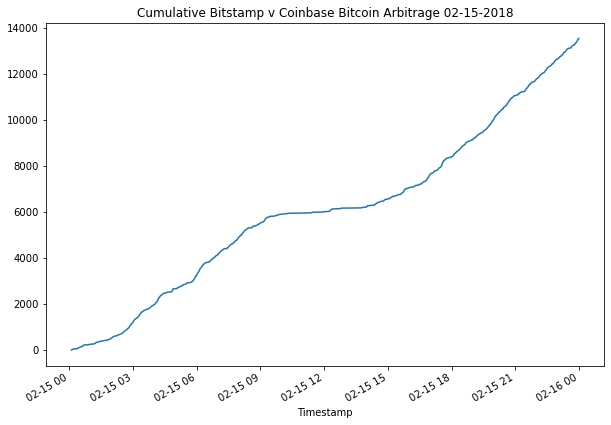

In [129]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumsum_profit_middle = profit_per_trade_middle.cumsum()

# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumsum_profit_middle.plot(figsize=(10,7), title="Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 02-15-2018")

<AxesSubplot:title={'center':'Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 03-15-2018'}, xlabel='Timestamp'>

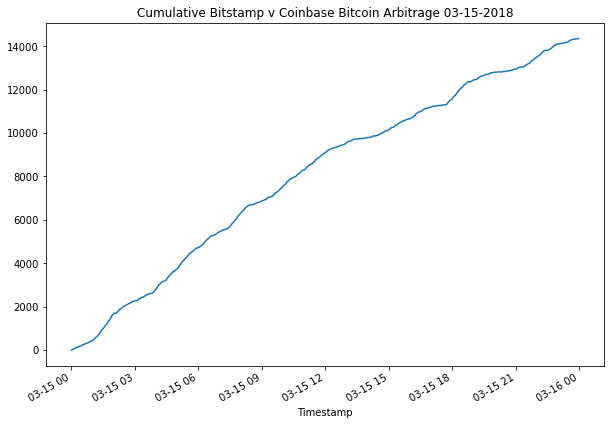

In [130]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumsum_profit_late = profit_per_trade_late.cumsum()

# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumsum_profit_late.plot(figsize=(10,7), title="Cumulative Bitstamp v Coinbase Bitcoin Arbitrage 03-15-2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The opportunity for abritrage existed more in the month of Jan 2018. Thereafter, the disparity between the 2 exchanges in February and March narrowed; reducing the profit margin and opportunities. By late March, virtually no opportunity for arbitrage existed.